# Cours Séries Temporelles

3 phases :

1️⃣ La représentation graphique : les diagrammes apparaissent en astronomie, le plus ancien connu remontant au 10ème siècle.

2️⃣ Les techniques temporelles déterministes (en opposition aux techniques probabilistes) : elles apparaissent aux 18ème et 19ème siècles, on distingue deux voies très importantes :

    L’analyse fréquentielle d’une série temporelle : un signal est approché par une
    somme de sinusoı̈dales (analyse de Fourier).

    La décomposition d’une série temporelle en composantes tendancielle, cyclique,
    saisonnière et accidentelle.

    La correction des variations saisonnières d’une série temporelle, qu’on étudiera,
    repose sur cette décomposition.

3️⃣ Les méthodes stochastiques (ou probabilistes) : elles émergent au 20ème siècle, et ont connu depuis un véritable essor. On étudiera une de ces méthodes : le modèle ARMA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing

In [3]:
folder = 'D:/Data_Analyst_Projet/Autres cours/Séries temporelles/Analysez+et+modelisez+des+series+temporelles/Analysez et modelisez des series temporelles/1 Datasets/'

## Import des fichiers et premier affichage

In [4]:
pop = pd.read_csv(folder + 'uspop.csv', index_col='t',parse_dates=True)
pop.head()

,uspop
t,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


<Axes: xlabel='t'>

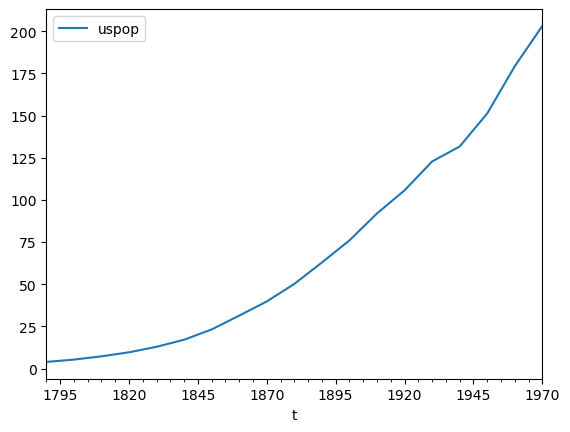

In [5]:
pop.plot()

In [6]:
airpass = pd.read_csv(folder + 'AirPassengers.csv', index_col='t',parse_dates=True)
airpass.head()

,Airpass
t,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='t'>

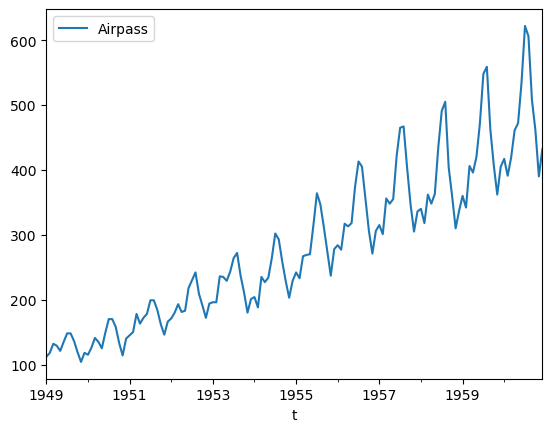

In [7]:
airpass.plot()

In [8]:
lynx = pd.read_csv(folder + 'lynx.csv', index_col='t',parse_dates=True)
lynx.head()

,Lynx
t,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


<Axes: xlabel='t'>

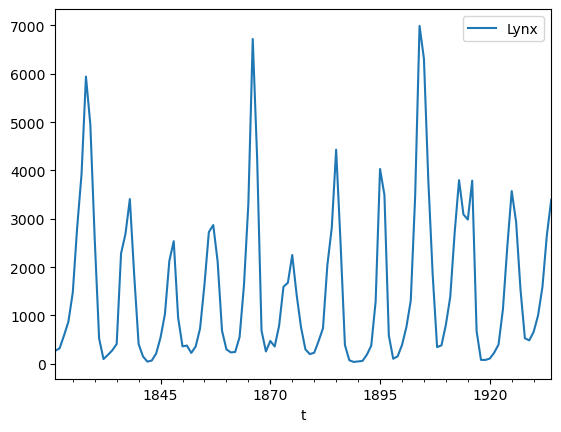

In [9]:
lynx.plot()

In [10]:
beer = pd.read_csv(folder + 'beer.csv', header=None, names=['t', 'beer'], index_col='t', parse_dates=True)
beer.head()

,beer
t,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: xlabel='t'>

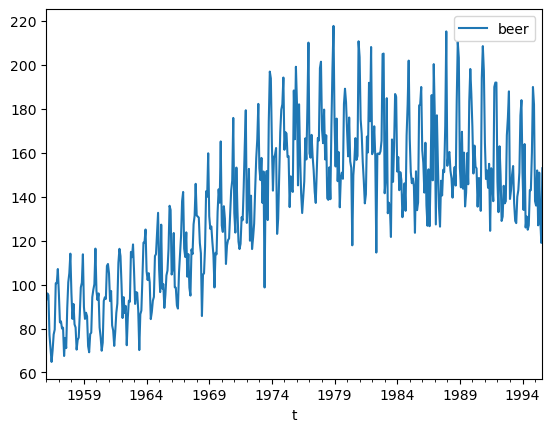

In [11]:
beer.plot()

In [12]:
sunspot = pd.read_csv(folder + 'sunspot.year.csv', index_col='t',parse_dates=True)
sunspot.head()

,sunspot
t,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


<Axes: xlabel='t'>

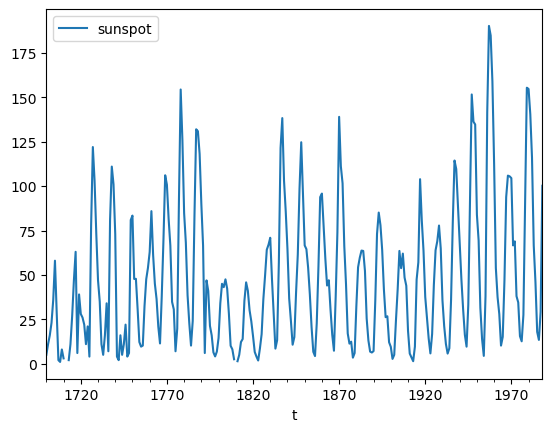

In [13]:
sunspot.plot()

## Les types de saisonnalité

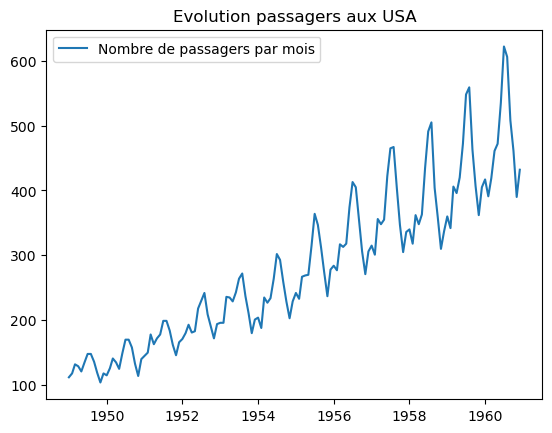

In [14]:
plt.plot(airpass.index, airpass['Airpass'], label='Nombre de passagers par mois')
# plt.plot(airpass.resample('Y').mean().index, airpass.resample('Y').mean()['Airpass'], label='Moyenne par an')

plt.title("Evolution passagers aux USA")

plt.legend()

plt.show()

Modèle multiplicatif :

Xt = Tt * (1 + St) * (1 + Rt)
   = Tt + TtSt 

La série temporelle est le produit de la tendance Tt, de la Saisonnalité et des résidus Rt.

L'amplitude de la saisonnalité évolue au cours du temps, comme sur la série temporelle ci-dessus.

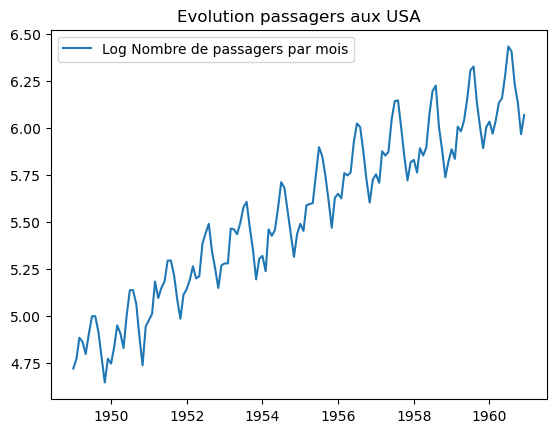

In [15]:
plt.plot(airpass.index, np.log(airpass['Airpass']), label='Log Nombre de passagers par mois')

plt.title("Evolution passagers aux USA")

plt.legend()

plt.show()

Modèle additif :

Xt = Tt + St + Rt

La série temporelle est la somme de la tendance Tt, de la Saisonnalité et des résidus Rt.

L'amplitude de la saisonnalité est constante au cours du temps, comme sur la série temporelle ci-dessus.

## TP : Désaisonnalisez airpass à l'aide de la régression linéaire

In [16]:
airpass.shape

(144, 1)

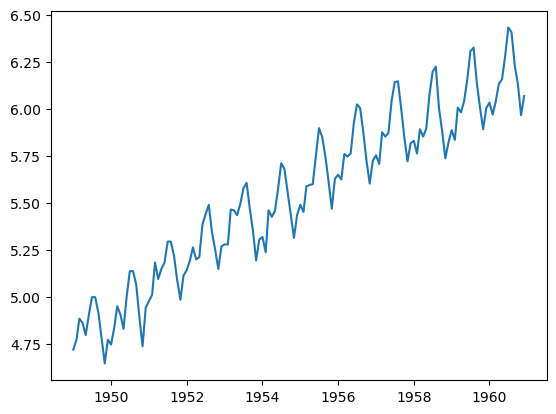

In [17]:
x = airpass
y = np.log(airpass)

plt.plot(y.index, y['Airpass'])

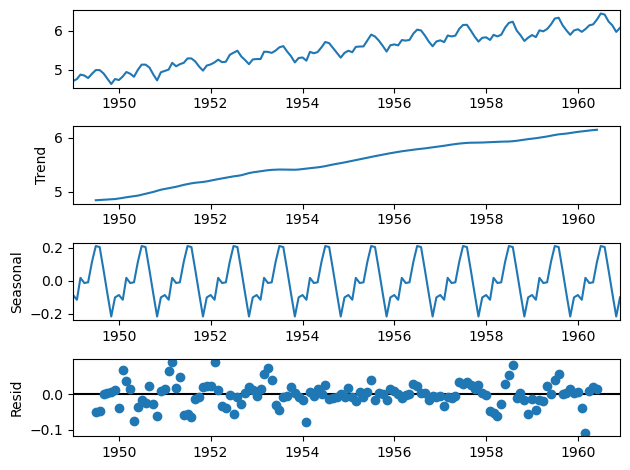

In [18]:
result = seasonal_decompose(y, model='additive')

result.plot()

plt.show()

In [19]:
t = range(1, y.shape[0]+1)
len_saison = 12

for i in range(len_saison):
    print(f"i = {i}")
    # repete 0 12 fois dans une liste
    su = np.repeat(0, repeats=len_saison)
    print(f"su = {su}")
    # ajoute un 1 à la position i
    su[i] = 1
    print(f"su = {su}")
    # repete su 12 fois dans ce cas 
    s = np.tile(su, y.shape[0] // len(su)+1)[:144]
    print(f"s = {s}")
    # genere une variable dynamiquement de la forme s(i)
    vars()['s' + str(i+1)] = s

i = 0
su = [0 0 0 0 0 0 0 0 0 0 0 0]
su = [1 0 0 0 0 0 0 0 0 0 0 0]
s = [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
i = 1
su = [0 0 0 0 0 0 0 0 0 0 0 0]
su = [0 1 0 0 0 0 0 0 0 0 0 0]
s = [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
i = 2
su = [0 0 0 0 0 0 0 0 0 0 0 0]
su = [0 0 1 0 0 0 0 0 0 0 0 0]
s = [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

En faisant ça on décompose notre série temporelle en sa tendance t et ses 12 saisons s, correspondant ici aux variations correspondant à chaque mois.

On calcule ensuite la régression linéaire afin de trouver les coefficients de notre modèle.

On aura :
Y = T + S + R
  = a0*t + a1*s1 + a2*s2 + a3*s3 + a4*s4 + a5*s5 + a6*s6 + a7*s7 + a8*s8 + a9*s9 + a10*s10 + a11*s11 + a12*s12 + R
  
avec a les coefficents de la régression linéaire.

In [20]:
np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose()

array([[  1,   1,   0, ...,   0,   0,   0],
       [  2,   0,   1, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       ...,
       [142,   0,   0, ...,   1,   0,   0],
       [143,   0,   0, ...,   0,   1,   0],
       [144,   0,   0, ...,   0,   0,   1]])

In [21]:
reg = LinearRegression(fit_intercept=False)

reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), y)

LinearRegression(fit_intercept=False)

In [22]:
# les coefficients du modèle
reg.coef_

array([[0.0100688 , 4.72678037, 4.70472554, 4.83495267, 4.80368381,
        4.80131117, 4.92345737, 5.0273997 , 5.01810486, 4.87347026,
        4.73531202, 4.59159431, 4.7054593 ]])

In [23]:
# coefficient de saisonnalité moyen
a = np.mean(reg.coef_[0][1:])
# coefficient de tendance
b = reg.coef_[0][0]
# coefficient de saisonnalité - coefficient de saisonnalité moyen
c = reg.coef_[0][1:13] - a

In [24]:
c.shape

(12,)

In [25]:
# y_cvs, série temporelle désaisonnalisée --> y - S_calculé
S_calcule = s1*c[0] + s2*c[1] + s3*c[2] + s4*c[3] + s5*c[4] + s6*c[5] + s7*c[6] + s8*c[7] + s9*c[8] + s10*c[9] + s11*c[10] + s12*c[11]

# y - S_calculé
y['y_cvs'] = y['Airpass'] - S_calcule

y

,Airpass,y_cvs
t,,
1949-01-01,4.718499,4.803906
1949-02-01,4.770685,4.878147
1949-03-01,4.882802,4.860037
1949-04-01,4.859812,4.868316
1949-05-01,4.795791,4.806667
...,...,...
1960-08-01,6.406880,6.200963
1960-09-01,6.230481,6.169199
1960-10-01,6.133398,6.210274


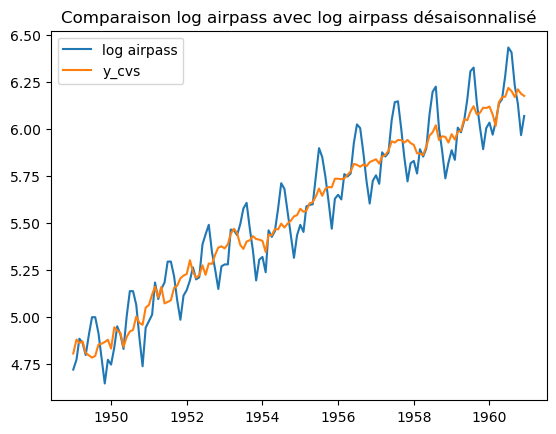

In [26]:
plt.plot(y.index, y['Airpass'], label='log airpass')

plt.plot(y.index, y['y_cvs'], label='y_cvs')

plt.title("Comparaison log airpass avec log airpass désaisonnalisé")
plt.legend()

plt.show()

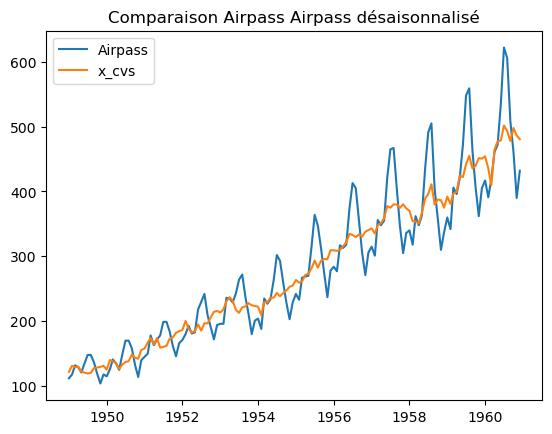

In [27]:
x['x_cvs'] = np.exp(y['y_cvs'])

plt.plot(x.index, x['Airpass'], label='Airpass')

plt.plot(x.index, x['x_cvs'], label='x_cvs')

plt.title("Comparaison Airpass Airpass désaisonnalisé")
plt.legend()

plt.show()

On distingue mieux les hausses et les baisses qui sont indépendantes de la saison.

## Désaisonnalisez à l'aide des moyennes mobiles

In [28]:
x.drop(columns='x_cvs')

,Airpass
t,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


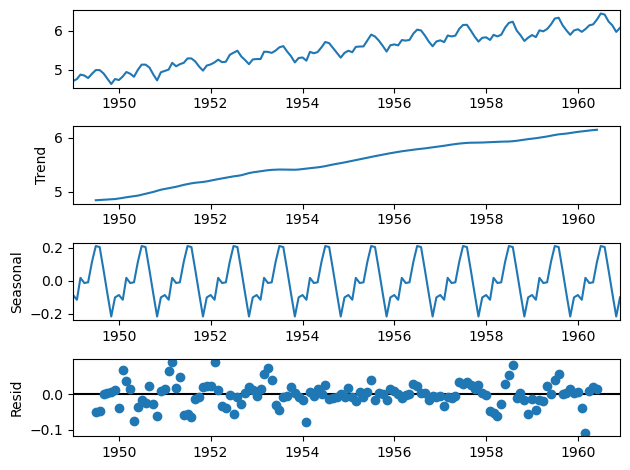

In [29]:
result = seasonal_decompose(y.drop(columns='y_cvs'), model='additive')
result.plot()

plt.show()

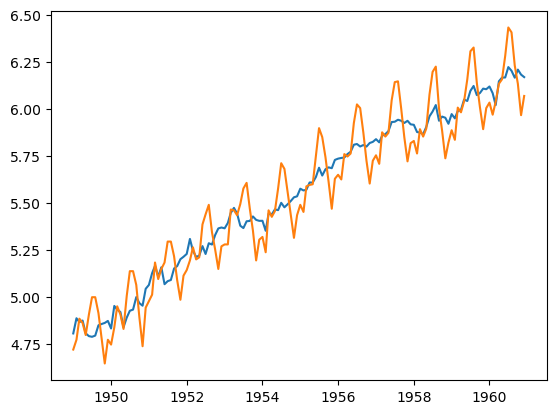

In [30]:
plt.plot(y['Airpass'] - result.seasonal)

plt.plot(y['Airpass'])
plt.show()

### Moyenne mobile

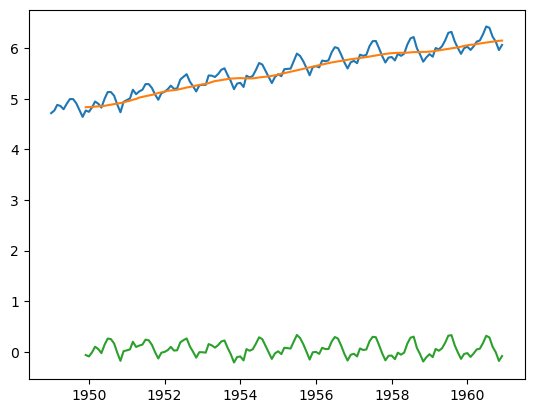

In [31]:
y['moyenne_mobile_12_mois'] = y['Airpass'].rolling(12).mean()

plt.plot(y['Airpass'])

plt.plot(y['moyenne_mobile_12_mois'])

plt.plot(y['Airpass'] - y['moyenne_mobile_12_mois'])

plt.show()

In [32]:
y.head(20)

,Airpass,y_cvs,moyenne_mobile_12_mois
t,,,
1949-01-01,4.718499,4.803906,NaN
1949-02-01,4.770685,4.878147,NaN
1949-03-01,4.882802,4.860037,NaN
1949-04-01,4.859812,4.868316,NaN
1949-05-01,4.795791,4.806667,NaN
1949-06-01,4.905275,4.794005,NaN
1949-07-01,4.997212,4.782000,NaN
1949-08-01,4.997212,4.791295,NaN
1949-09-01,4.912655,4.851372,NaN


## Lissage exponentielle

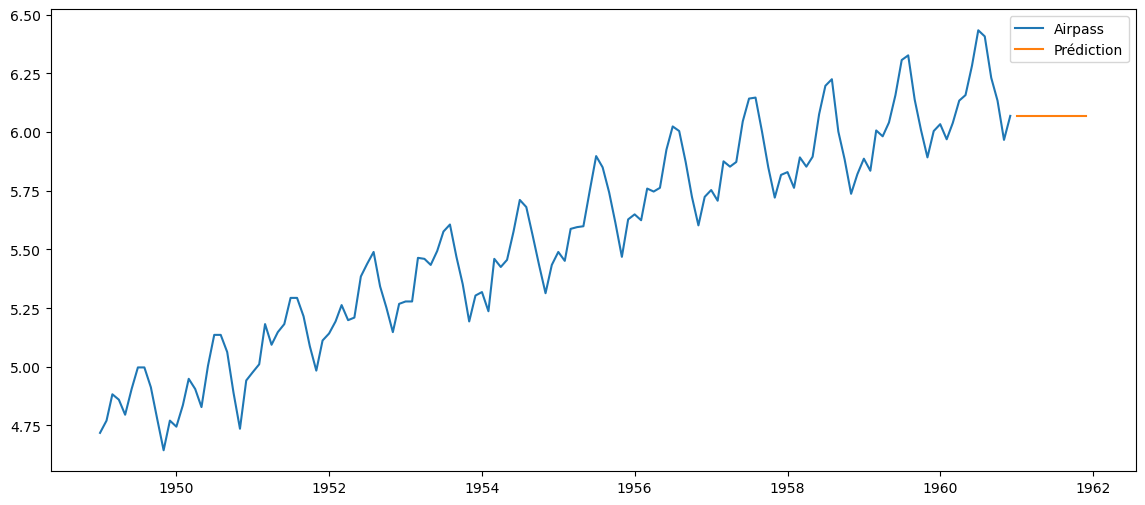

In [33]:
# lissage exponentielle simple basé uniquement sur la dernière valeur
les = ExponentialSmoothing(y['Airpass'].values, trend=None, seasonal=None).fit()

les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')

plt.plot(pd.date_range(start = y.index[len(y)-1], periods=len(les_pred), freq='M'), les_pred, label='Prédiction')

plt.legend()

plt.show()

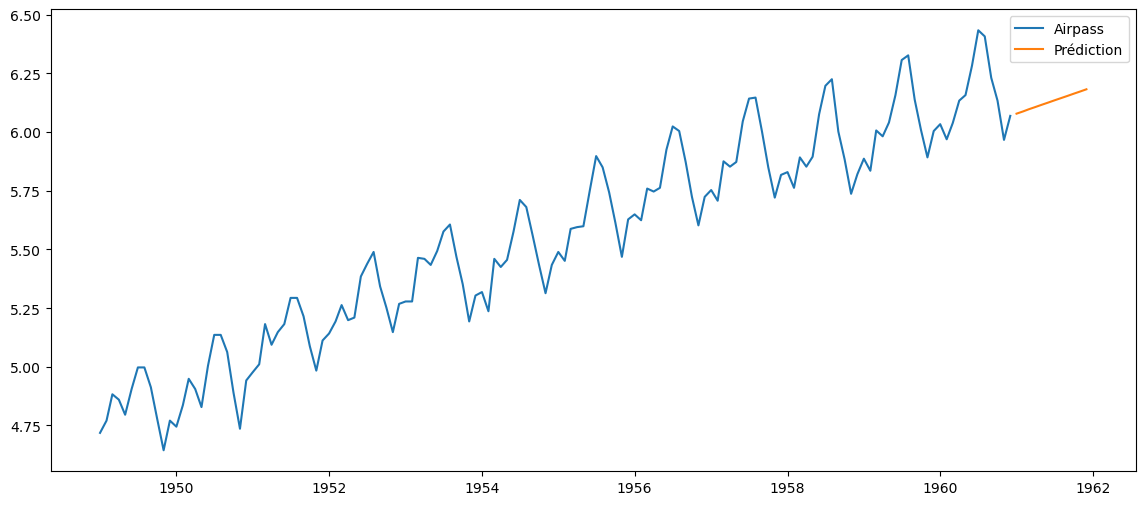

In [34]:
# lissage exponentielle double basé sur la dernière valeur et la tendance
les = ExponentialSmoothing(y['Airpass'].values, trend='additive', seasonal=None).fit()

les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')

plt.plot(pd.date_range(start = y.index[len(y)-1], periods=len(les_pred), freq='M'), les_pred, label='Prédiction')

plt.legend()

plt.show()

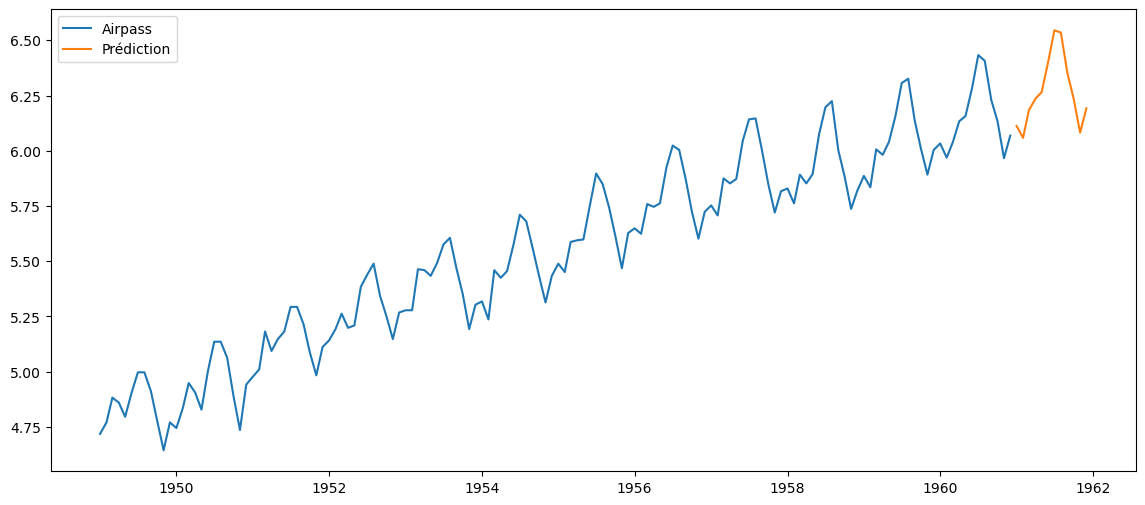

In [35]:
# lissage exponentielle double basé sur la dernière valeur, la tendance et la saisonnalité -> méthode de Hold-Winters
les = ExponentialSmoothing(y['Airpass'].values, trend='additive', seasonal='additive', seasonal_periods=12).fit()

les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y['Airpass'], label='Airpass')

plt.plot(pd.date_range(start = y.index[len(y)-1], periods=len(les_pred), freq='M'), les_pred, label='Prédiction')

plt.legend()

plt.show()

# Modèle Séries temporelles

## Prérequis

Après une modélisation, il doit rester du bruit blanc, c'est à dire des observations aléatoires :
- Espérance nulle
- Variance constante sigma²
- Covariance nulle, variables non corrélées, non temporellement dépendantes

Il existe des tests de blancheur (test de Portemanteau) pour vérifier que les résidus de la modélisation sont bien du bruit blanc.

Pour modéliser une série temporelle, son processus doit être stationnaire, cest à dire que :
- Son espérance doit être constante dans le temps 
- Sa variance doit être constante dans le temps
- Les covariances entre 2 instants du processus doivent être constant dans le temps : la covariance entre 2 évènements ne dépend que de leur intervalle dans le temps

La somme de 2 processus stationnaire n'est pas forcément stationnaire.

On devra modifier notre série temporelle pour la rendre stationnaire.

Par exemple pour une série temporelle X = at + b
on rendra stationnaire la série en travaillant sur Y = Xt - Xt-1

Fonction d'autocovariance :
- covariance entre un instant T et T-1

Fonction autocorrélogramme simple :
- corrélation entre un instant T et T-1, covariance normalisée

Autocorrélation partiel, corrélation entre 2 instants éloignés conditionnellement aux instants intermédiaires, c'est à dire en éliminant l'effet des évènements intermédiaire :
- algorithme Durbin-Levinson

Pour estimer :
- L'espérance : moyenne empirique
- Autocorrélation simple : autocorrélation simple empirique
- Autocorrélation partiel : algo de Durbin-Levinson sur autocorrélation simple empirique

Test de Portemanteau : test de blancheur
- Vérifie que l'autocorélation est faible (proche de 0) dans les résidus (autocorrélation²), on va chercher à minimiser cette indicateur.

## Modèle ARMA

AR : Auto Regressive d'ordre p  
Le passé de la série explique la série à un instant t  
Relation linéaire entre Xt et les p derniers instants de Xt  
autocorrélation partielle qui s'annule à partir du rang p+1  
autocorrélation simple vont décroitre rapidement vers 0, soit de manière exponentielle, soit sinusoidale amortie  
L'ordre p d'un processus AR va définir le nombre de valeurs passées utilisées pour prédire l'avenir.  
Les coefficents autorégressifs sigma vont définir les poids de chaque valeurs passés sur la série temporelle futurs.  
On les détermine avec les moindres carrés ou le maximum de vraisemblance pour minimiser les erreurs de prédictions.  
On va déterminer l'ordre p en analysant la fonction d'autocorrélation partielle (PACF).  

MA : Moving Average d'ordre q 
combinaison linéaire du bruit blanc et de q instants de ce bruit blanc  
c'est à dire combinaison linéaire de ses résidus et des q derniers instants de ses résidus  
autocorrélation simple qui s'annule à partir du rang q+1  
autocorrélation partielle vont décroitre rapidement vers 0  
On va déterminer l'ordre q en analysant la fonction d'autocorrélation simple (ACF).

ARMA : combinaison des 2  

Synthèse : 

AR d'ordre p :  
Xt est une combinaison linéaire de ses p valeurs antérieurs + une composante d'erreurs aléatoire
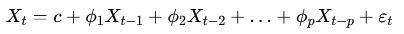

MA d'ordre q :
Xt est une combinaison linéaire de ses résidus et des q instants antérieurs de ses résidus
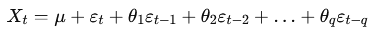

ARMA : combinaison des 2
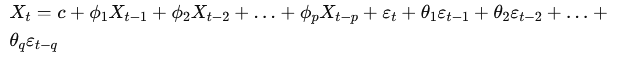

## Modèle ARIMA SARIMA

Ils sont utilisés quand les processus ne sont pas stationnaire (presque toujours dans la réalité).  
ARIMA intégre la différenciation Yt = Xt - Xt-1  
la différence est noté d et indique le degré de différenciation pour rendre la série stationnaire

SARIMA intégre la diférenciation Yt = Xt - Xt-période, exemple : si saisonnalité est de 12 mois, on fera Xt-12
SARIMA vise à faire abstraction de l'effet saisonnier

Les modèles SARIMA permettent de modéliser des séries qui présentent une saisonnalité.

Estimer un modèle SARIMA se ramène en pratique à l'estimation d'un modèle ARMA sur la série différenciée.

SARIMA(p, d, q)(P, D, Q) avec des facteurs pour modéliser à la fois les tendances saisonnières et non saisonnières.

### Etapes modélisation série temporelle

- Stationnarisation
    - décomposition saisonnière (peu utilisée)
    - différentiation (très utilisé, compris dans les modèles ARIMA SARIMA)
    - méthode de Box-Cox (ex: transformation logarithmique)
    - test de stationnarisation pour vérifier que les transformations ont fonctionné
    
    
- Différentisation
    On va vérifier l'ACF (fonction d'autocorrélation)
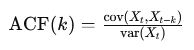

    Si décroissance lente --> différencialisation en tendance  
    Si pics de manière périodique -> différencialisation en saisonnalité

Formule PACF
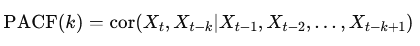

- Identification de modèles à priori
    - modèle AR : PACF qui s'annule à partir du rang p+1
    - modèle MA : ACF qui s'annule à partir du rang q+1

ACF et PACF doivent décroitre rapidement vers 0 pour valider le modèle AR et MA

tant que cela n'arrive pas, procéder à la différentiation

test de blancheur --> test de Ljung-Box

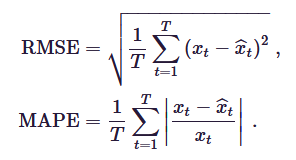

### Cas Pratique sur Airpass

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
y.head()

,Airpass,y_cvs,moyenne_mobile_12_mois
t,,,
1949-01-01,4.718499,4.803906,NaN
1949-02-01,4.770685,4.878147,NaN
1949-03-01,4.882802,4.860037,NaN
1949-04-01,4.859812,4.868316,NaN
1949-05-01,4.795791,4.806667,NaN


In [38]:
# Fonction d'autocorrélation
acf(y['Airpass'])

array([1.        , 0.95370337, 0.89891595, 0.85080249, 0.80842517,
       0.77889939, 0.75644222, 0.73760171, 0.72713135, 0.7336487 ,
       0.74425525, 0.75802665, 0.76194292, 0.71650448, 0.66304279,
       0.61836286, 0.57620873, 0.54380132, 0.51945611, 0.50070292,
       0.4904028 , 0.4981819 ])

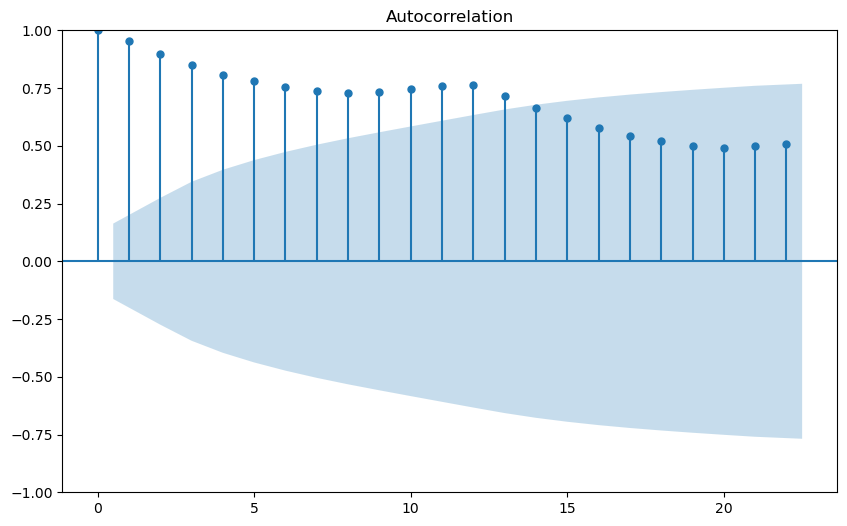

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(y['Airpass'], ax=ax)
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

def test_stationnaire(series):
    result = adfuller(series)
    print("H0 : La série n'est pas stationnaire",'\n', "H1 : La série est stationnaire")
    print('Statistique du test ADF :', result[0])
    print('Valeur p :', result[1])
    print('Valeurs critiques :', result[4])
    if result[1] < 0.05:
        print('p-value < 0.05, on rejette H0 --> La série temporelle est stationnaire.')
    else:
        print('p-value > 0.05, on ne peut pas rejeter H0 --> La série temporelle n\'est pas stationnaire.')

In [41]:
test_stationnaire(y['Airpass'])

H0 : La série n'est pas stationnaire 
 H1 : La série est stationnaire
Statistique du test ADF : -1.7170170891069636
Valeur p : 0.4223667747703897
Valeurs critiques : {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
p-value > 0.05, on ne peut pas rejeter H0 --> La série temporelle n'est pas stationnaire.


In [42]:
adfuller(y['Airpass'])

(-1.7170170891069636,
 0.4223667747703897,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

La sortie ACF présente une décroissance lente vers 0 --> problème de non stationnarité

on procède donc à une différenciation par tendance

on effectue donc une différenciation (I - B)

#### Différenciation par la tendance

In [43]:
# différenciation en tendance
y_dif1 = (y['Airpass'] - y['Airpass'].shift(1)).dropna()

In [44]:
acf(y_dif1)

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439, -0.1073849 ])

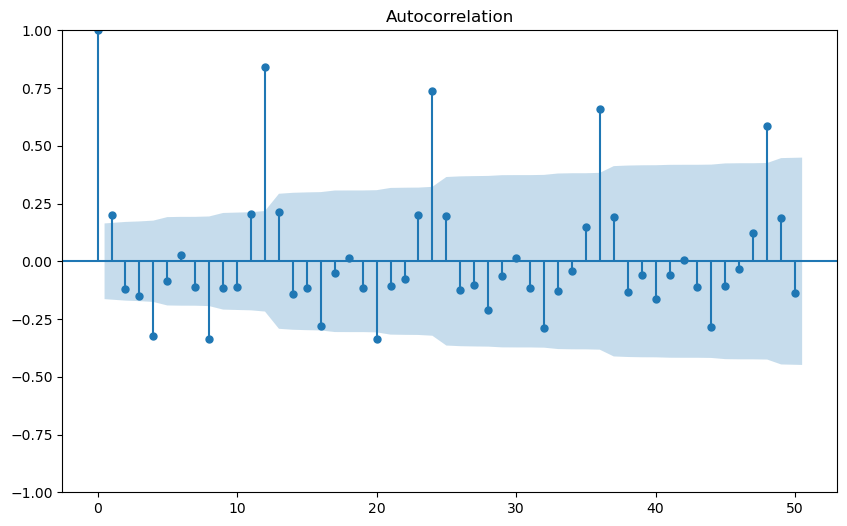

In [45]:
# on affiche la fonction d'autocorrélation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(y_dif1, ax=ax, lags=50)
plt.show()

On constate une décroissance lente pour les multiples de 12

On va donc effectuer une différenciation (I - B12)

In [46]:
test_stationnaire(y_dif1)

H0 : La série n'est pas stationnaire 
 H1 : La série est stationnaire
Statistique du test ADF : -2.7171305983881675
Valeur p : 0.07112054815085295
Valeurs critiques : {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
p-value > 0.05, on ne peut pas rejeter H0 --> La série temporelle n'est pas stationnaire.


#### Différenciation en saisonnalité

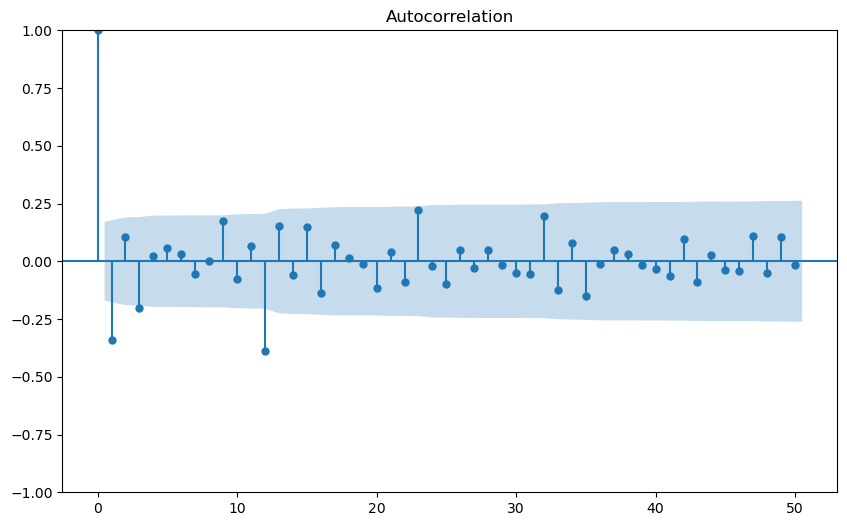

In [47]:
y_dif_1_12 = (y_dif1 - y_dif1.shift(12)).dropna()

# on affiche la fonction d'autocorrélation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(y_dif_1_12, ax=ax, lags=50)
plt.show()

In [48]:
test_stationnaire(y_dif_1_12)

H0 : La série n'est pas stationnaire 
 H1 : La série est stationnaire
Statistique du test ADF : -4.443324941831128
Valeur p : 0.0002485912311383993
Valeurs critiques : {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
p-value < 0.05, on rejette H0 --> La série temporelle est stationnaire.


On constate une décroissance rapide, et le test statistique confirme que le processus a été rendu stationnaire.

### Identification et choix des modèles

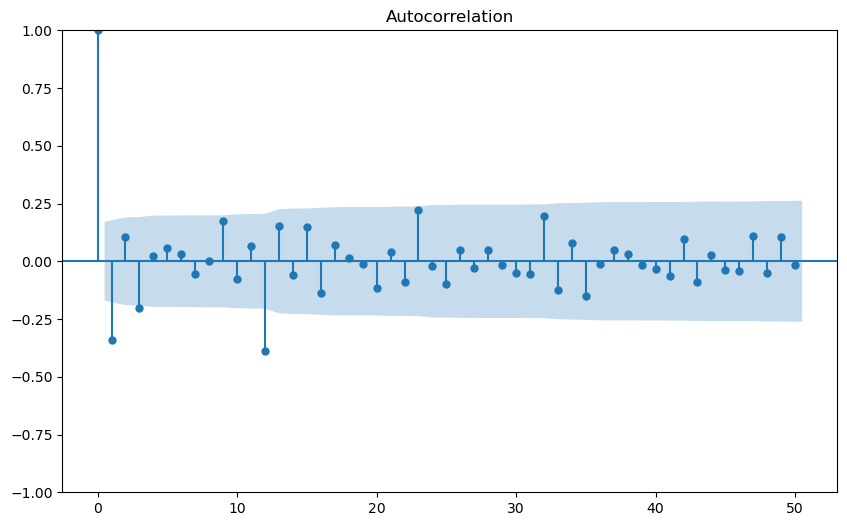

In [49]:
# on affiche la fonction d'autocorrélation simple
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(y_dif_1_12, ax=ax, lags=50)
plt.show()

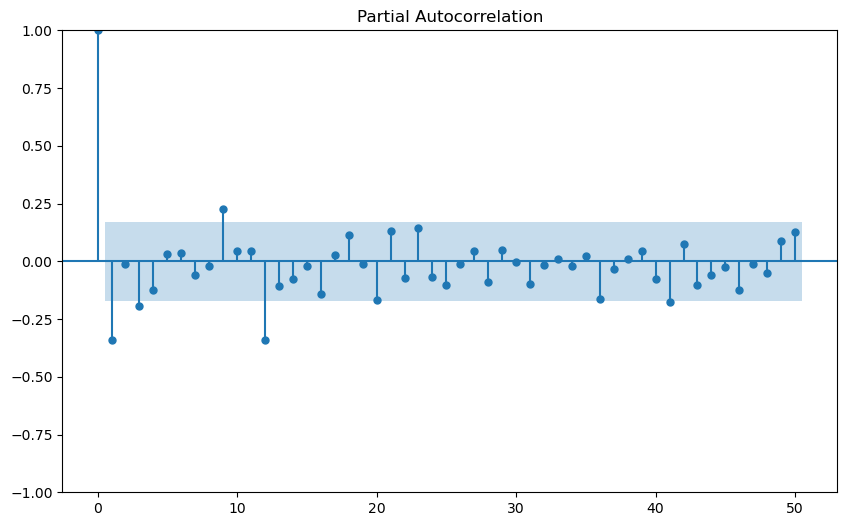

In [50]:
# on affiche la fonction d'autocorrélation partielle
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(y_dif_1_12, ax=ax, lags=50, method='ywm')
plt.show()

In [51]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [52]:
model1 = SARIMAX(y['Airpass'], order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.152
Date:                            Sun, 11 Feb 2024   AIC                           -480.304
Time:                                    09:03:42   BIC                           -465.928
Sample:                                01-01-1949   HQIC                          -474.462
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1661      0.213      0.781      0.435      -0.251       0.583
ma.L1         -0.5612      0.185   

AR pour la tendance et la saisonnalité n'est pas représentative, on relance le modèle en modifiant le paramètre le moins significatif.

In [53]:
print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt, return_df=False)[1].mean()))

Retard : p-value
6 : 0.9809961005351315
12 : 0.9079539429837234
18 : 0.6206667554846299
24 : 0.5191339172561719
30 : 0.5170728700150963
36 : 0.5615341206826925


Le test de bruit blanc est bien vérifié à différents instants.

In [54]:
model2 = SARIMAX(y['Airpass'], order=(1,1,1), seasonal_order=(0,1,1,12))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt, return_df=False)[1].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.946
Date:                            Sun, 11 Feb 2024   AIC                           -481.893
Time:                                    09:03:44   BIC                           -470.392
Sample:                                01-01-1949   HQIC                          -477.220
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1963      0.199      0.986      0.324      -0.194       0.586
ma.L1         -0.5786      0.171   

Le test sur les résidus est passé mais pas le paramètre AR pour la tendance.

On relance encore le modèle.

In [55]:
model3 = SARIMAX(y['Airpass'], order=(0,1,1), seasonal_order=(0,1,1,12))
results3 = model3.fit()
print(results3.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt, return_df=False)[1].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Sun, 11 Feb 2024   AIC                           -483.393
Time:                                    09:03:44   BIC                           -474.767
Sample:                                01-01-1949   HQIC                          -479.888
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4016      0.073     -5.500      0.000      -0.545      -0.258
ma.S.L12      -0.5564      0.096   

In [56]:
from scipy.stats import shapiro

In [57]:
shapiro(results3.resid)

ShapiroResult(statistic=0.16898971796035767, pvalue=5.1871770689937225e-25)

Test de normalité validé pour les résidus.

## Prédiction

In [58]:
pred_model3 = results3.get_forecast(12)

pred = np.exp(pred_model3.predicted_mean)

pred_lower = np.exp(pred_model3.conf_int()['lower Airpass'])

pred_upper = np.exp(pred_model3.conf_int()['upper Airpass'])

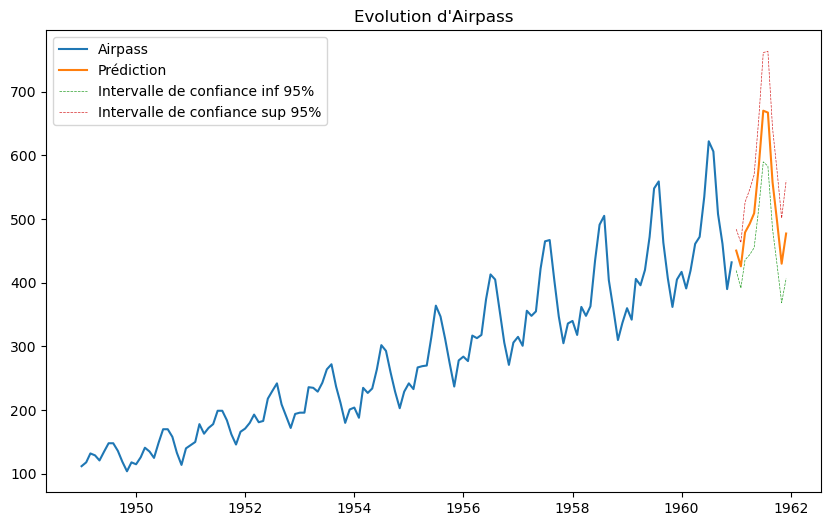

In [59]:
plt.figure(figsize=(10,6))
plt.title("Evolution d'Airpass")
plt.plot(x['Airpass'], label='Airpass')
plt.plot(pred, label='Prédiction')
plt.plot(pred_lower, linestyle='--', lw=0.5, label='Intervalle de confiance inf 95%')
plt.plot(pred_upper, linestyle='--', lw=0.5, label='Intervalle de confiance sup 95%')
plt.legend()
plt.show()

## Analyse à posteriori

In [60]:
train = y['Airpass'][:'1959']
test = y['Airpass']['1960':]

In [61]:
model4 = SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,12))
results4 = model4.fit()
print(results4.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results4.resid, lags=elt, return_df=False)[1].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Airpass   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.627
Date:                            Sun, 11 Feb 2024   AIC                           -441.253
Time:                                    09:03:45   BIC                           -432.916
Sample:                                01-01-1949   HQIC                          -437.868
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3484      0.081     -4.299      0.000      -0.507      -0.190
ma.S.L12      -0.5621      0.094   

In [62]:
pred_model4 = results4.get_forecast(12)

pred = np.exp(pred_model4.predicted_mean)

pred_lower = np.exp(pred_model4.conf_int()['lower Airpass'])

pred_upper = np.exp(pred_model4.conf_int()['upper Airpass'])

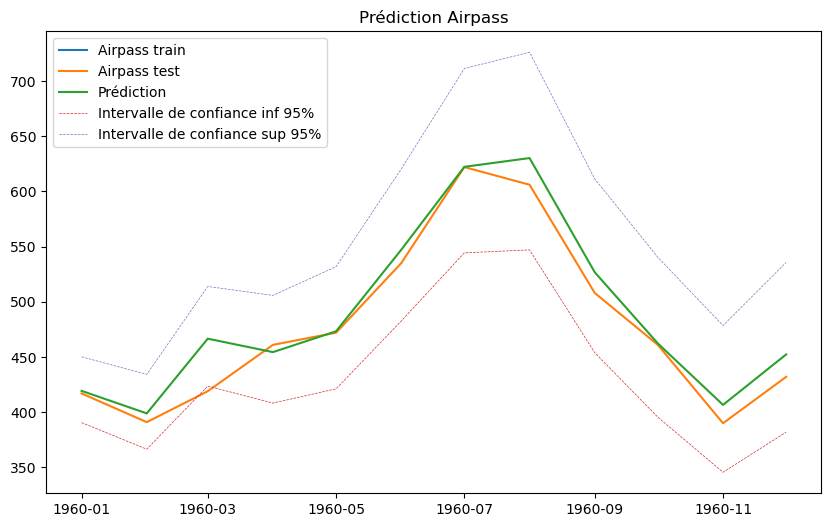

In [63]:
plt.figure(figsize=(10,6))
plt.title("Prédiction Airpass")
plt.plot(np.exp(train['1960':]), label='Airpass train')
plt.plot(np.exp(test), label='Airpass test')
plt.plot(pred, label='Prédiction')
plt.plot(pred_lower, linestyle='--', lw=0.5, label='Intervalle de confiance inf 95%')
plt.plot(pred_upper, linestyle='--', lw=0.5, label='Intervalle de confiance sup 95%')
plt.legend()
plt.show()

In [64]:
pred

1960-01-01    419.326911
1960-02-01    398.920850
1960-03-01    466.579896
1960-04-01    454.407494
1960-05-01    473.266672
1960-06-01    547.121808
1960-07-01    622.222771
1960-08-01    630.158796
1960-09-01    526.749189
1960-10-01    462.292484
1960-11-01    406.630738
1960-12-01    452.298597
Freq: MS, Name: predicted_mean, dtype: float64

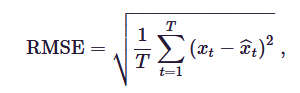

In [65]:
# erreur quadratique moyenne
rmse = np.sqrt(np.sum((np.exp(test) - pred)**2)/len(test))
rmse

18.595516643822723

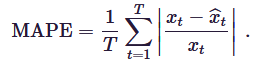

In [68]:
# erreur relative absolu moyenne en %
mape = 100*np.sum(np.abs((np.exp(test) - pred)/np.exp(test)))/len(test)
mape

2.9050134800628515

In [71]:
test

t
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Airpass, dtype: float64